In [85]:
import numpy as np
import emcee
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [97]:
import importlib

In [86]:
import utils
import grad_descent_module as gdm

In [3]:
def grad_norm_squared(V, x ,factor=1):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = V(x)  # compute V at each point
    gradients = tape.gradient(loss, x)  # compute ∇V at each point
    #norm_squared = tf.reduce_sum(gradients**2, axis=1)  # ||∇V||^2 at each point
    norm_squared = tf.reduce_sum(gradients**2) 
    return np.log(norm_squared.numpy())

def get_grad(V, x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = V(x)  # compute V at each point
    gradients = tape.gradient(loss, x)  # compute ∇V at each point
    return gradients

In [4]:
def V3param(x):
    x1,x2,x3=tf.split(x, 3, axis=1)
    #x1,x2,x3 = x
    return 0.5 * (4 + tf.exp(6 * x1) + tf.exp(-2 * x1 -4 * (3 ** -0.5) * x2) -2 * (tf.exp(2 * x1 -2 * (3 ** -0.5) * x2)) -4 * (tf.exp(-2 * x1 -((3 ** -0.5) * x2))) -4 * (tf.exp(2 * x1 + (3 ** -0.5) * x2)) -4 * (x3 ** 2) + 2 * (tf.exp(-4 * x1 -2 * (3 ** -0.5) * x2)) * (x3 ** 2) + 2 * (tf.exp(4 * x1 + 2 * (3 ** -0.5) * x2)) * (x3 ** 2) + (tf.exp(-6 * x1)) * (x3 ** 4) -2 * (tf.exp(-2 * x1 + 2 * (3 ** -0.5) * x2)) * (x3 ** 4) + (tf.exp(2 * x1 + 4 * (3 ** -0.5) * x2)) * (x3 ** 4))


In [5]:
###

In [6]:
def log_probability(x, V, factor=1):
    x = tf.convert_to_tensor(x, dtype=tf.float32)  
    potential = (grad_norm_squared(V, x, factor))
    return -potential.numpy()  

In [7]:
n_walkers = 300
n_steps = 1000  

xtrunc = x[:n_walkers,:]

sampler = emcee.EnsembleSampler(n_walkers, 3, log_probability, args=[V3param], moves=emcee.moves.GaussianMove(10**(-3)))


NameError: name 'x' is not defined

In [328]:
sampler.run_mcmc(xtrunc, n_steps, progress=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [58:13<00:00,  3.49s/it]


State([[ 2.79239774e-01 -9.64000106e-01 -1.82346161e-02]
 [-8.66792977e-01  3.08157516e+00  2.45548651e-01]
 [-8.50291625e-02 -2.11670958e-02  2.67870545e-01]
 [ 6.14090621e-01 -2.12303901e+00 -1.62220836e-01]
 [ 3.70056689e-01 -1.28776193e+00 -1.44532657e+00]
 [-2.35149294e-01  9.75992322e-01  1.75994277e-01]
 [ 1.53513908e-01 -5.72844744e-01 -8.23237956e-01]
 [ 2.17617854e-01 -7.34736323e-01 -7.32863128e-01]
 [ 7.47194067e-02 -1.51926130e-01 -4.91759896e-01]
 [-1.21771209e-01  5.29788017e-01  3.32468688e-01]
 [-1.37373984e+00  4.45983696e+00 -6.94471747e-02]
 [-3.98819260e-02  1.73389524e-01 -4.76433098e-01]
 [-6.41014755e-01  2.14712596e+00 -5.61025679e-01]
 [-3.81062597e-01  1.16102183e+00 -1.62538230e-01]
 [-1.11317351e-01  3.83734763e-01  4.87375259e-01]
 [ 4.29921210e-01 -1.50852239e+00  5.99674761e-01]
 [ 1.56063465e-02  4.57469583e-01 -1.98146537e-01]
 [-3.87324691e-01  1.34445846e+00  1.49821663e+00]
 [ 1.41001910e-01 -5.02533734e-01  1.54394358e-01]
 [-1.18456483e-01 -7.8158

In [329]:
samples = sampler.get_chain()

In [330]:
last_steps = samples[-1,:,:]
last_10steps = samples[-10,:,:]
last_50steps = samples[-50,:,:]
last_100steps = samples[-100,:,:]
last_200steps = samples[-200,:,:]

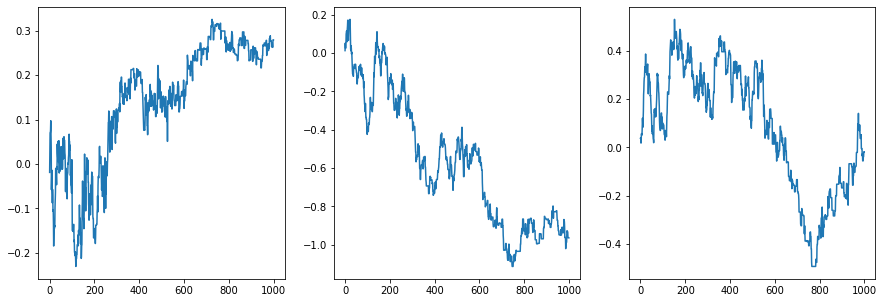

In [331]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(samples[:,0,0])
plt.subplot(1,3,2)
plt.plot(samples[:,0,1])
plt.subplot(1,3,3)
plt.plot(samples[:,0,2])
plt.show()

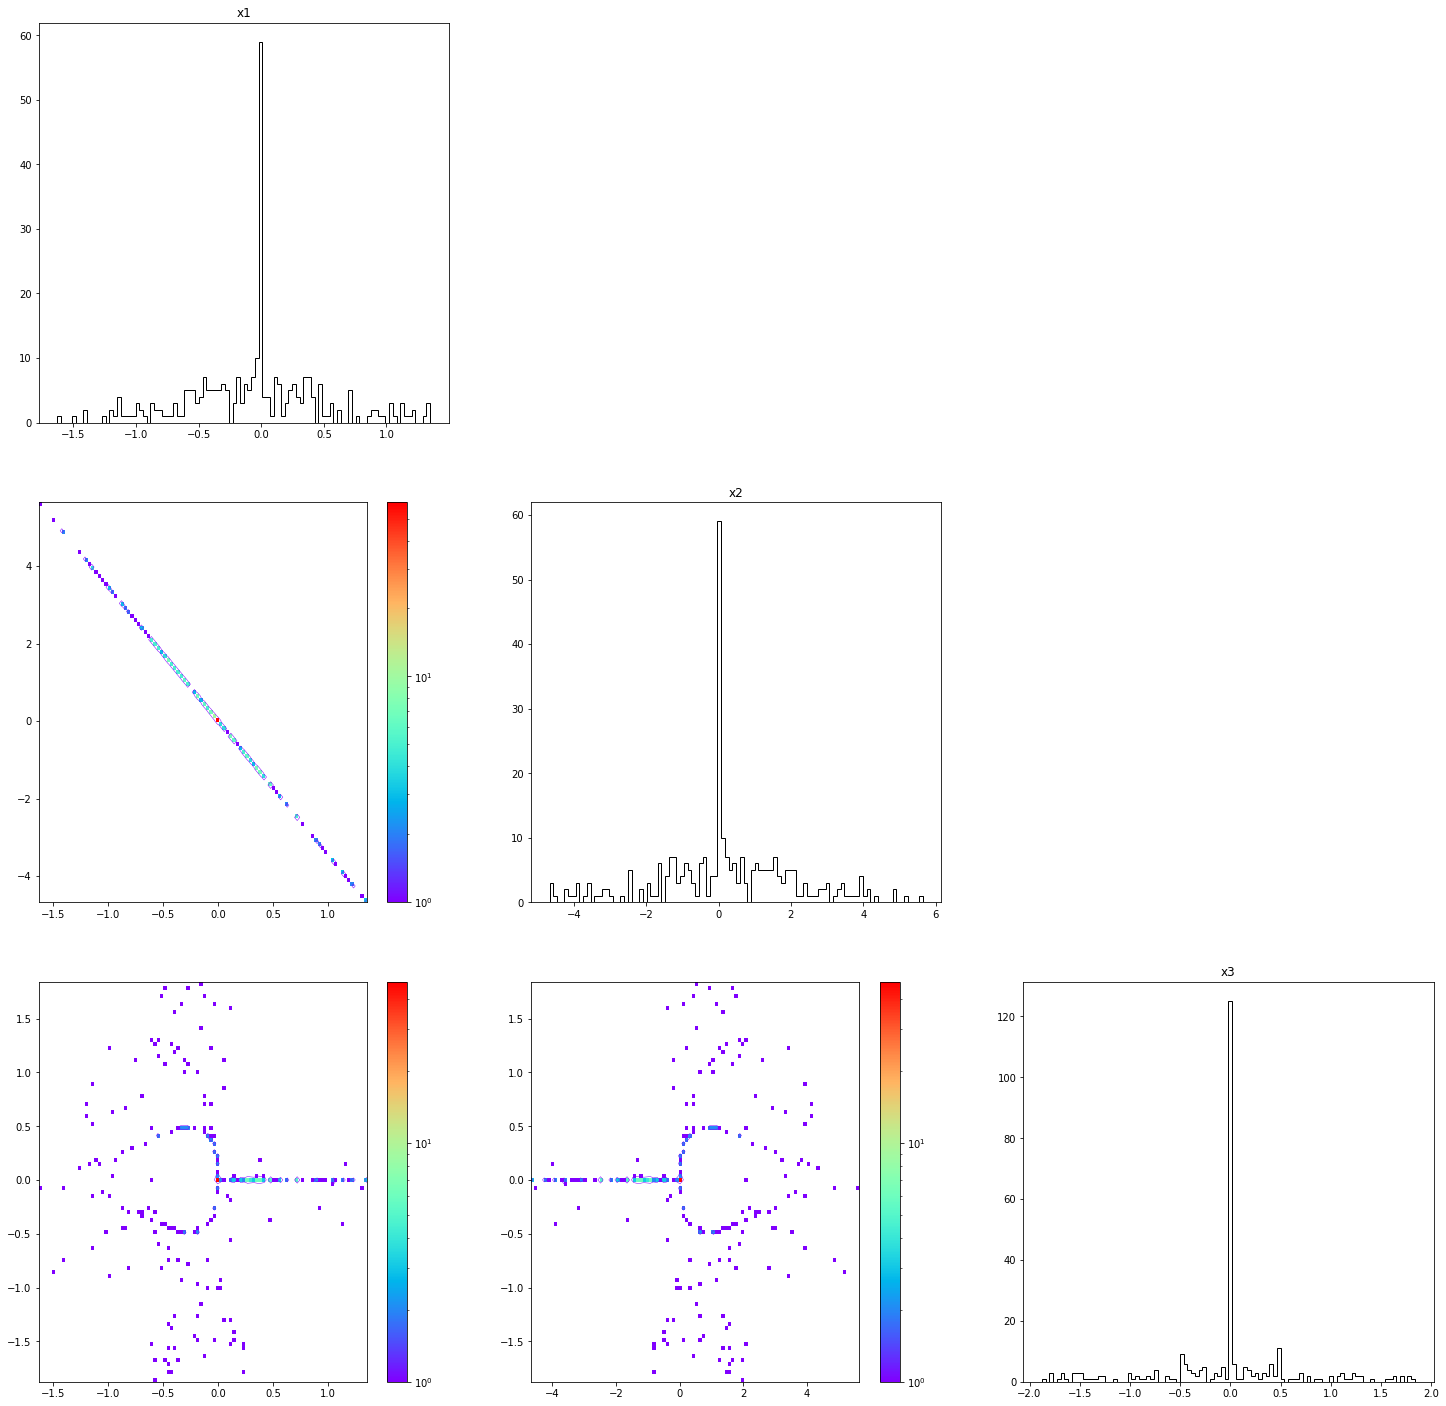

In [332]:
utils.triangular_plot(xtrunc)

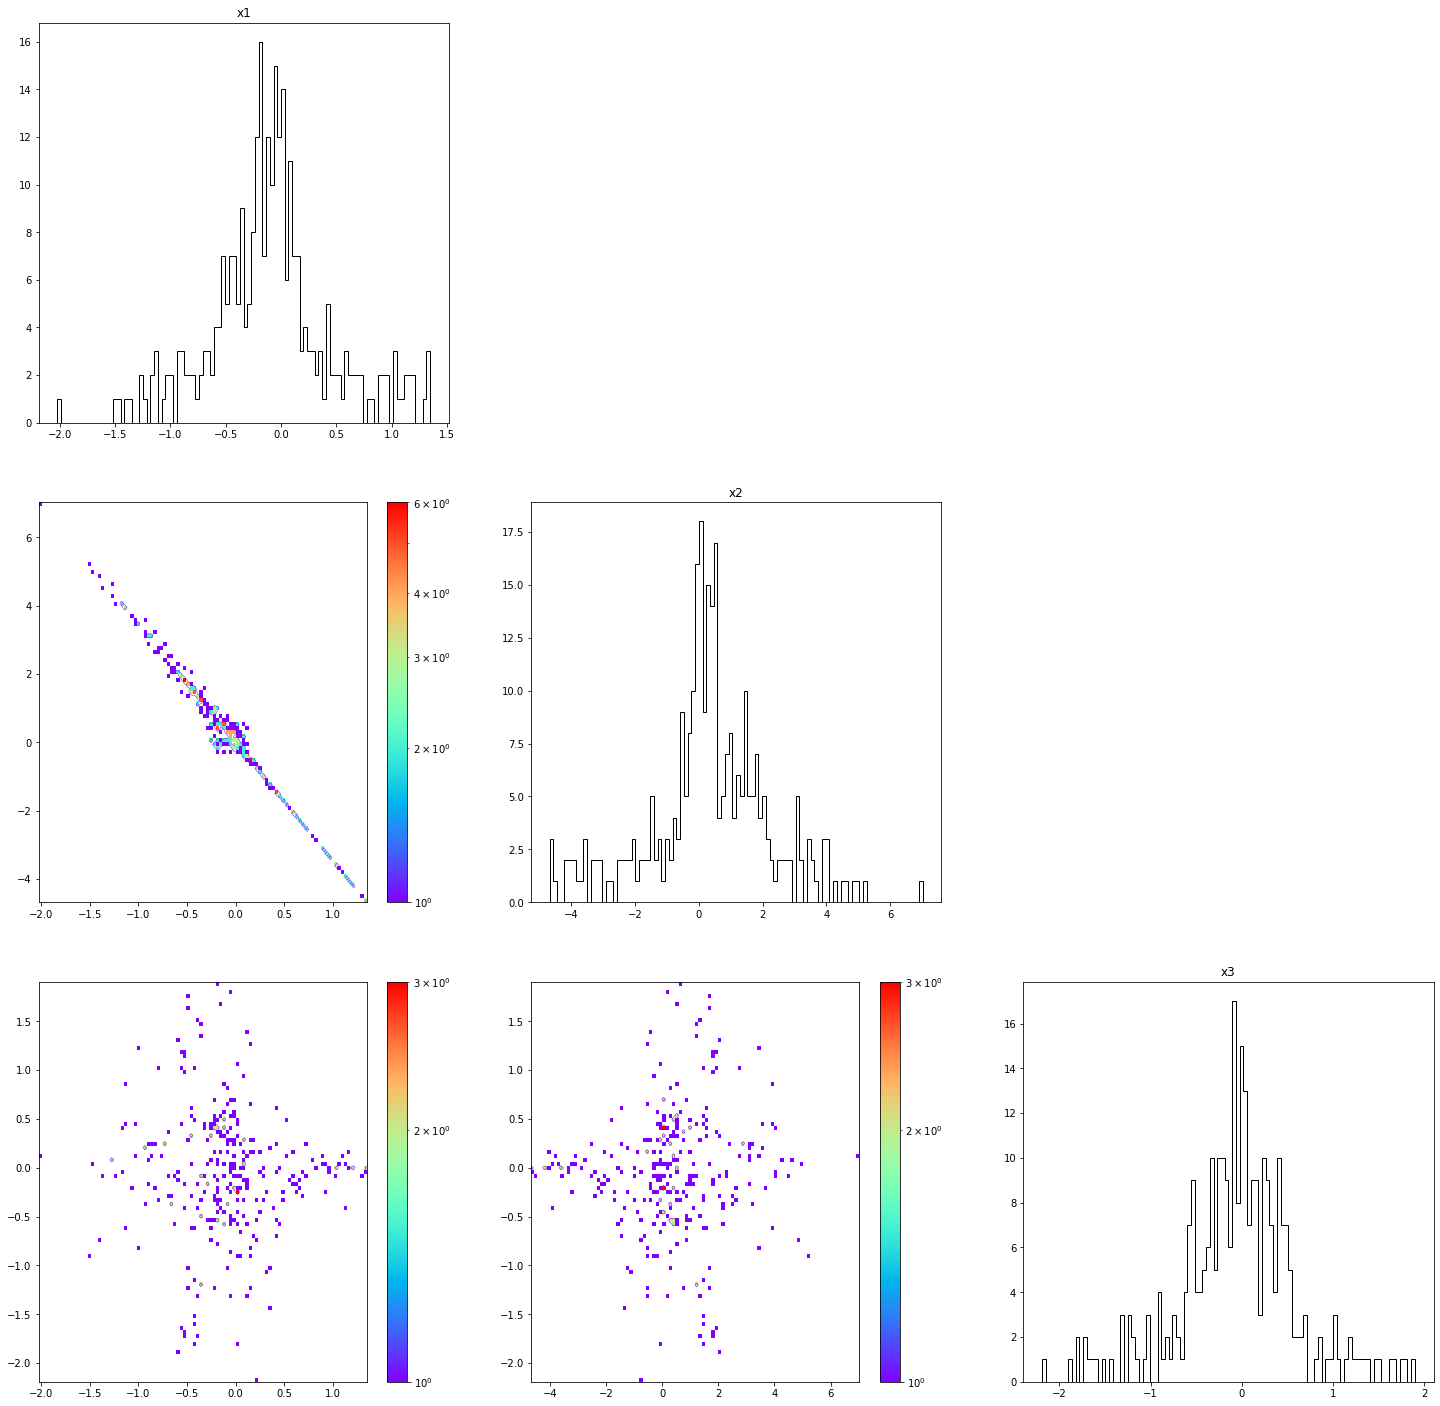

In [333]:
utils.triangular_plot(samples[-1,:,:])

In [337]:
hist_x, new_x = gdm.grad_descent_potential(V3param,new_x,n_steps=500,alpha=0.00001,update_opt=False)


Step 0: ||∇V||^2 = 0.00123318312509464 with learning rate 9.999999747378752e-06
Step 10: ||∇V||^2 = 0.6141783861924325 with learning rate 9.999999747378752e-06
Step 20: ||∇V||^2 = 0.11426523727438702 with learning rate 9.999999747378752e-06
Step 30: ||∇V||^2 = 0.013517130757391168 with learning rate 9.999999747378752e-06
Step 40: ||∇V||^2 = 0.01432724300508541 with learning rate 9.999999747378752e-06
Step 50: ||∇V||^2 = 0.007660248337775965 with learning rate 9.999999747378752e-06
Step 60: ||∇V||^2 = 0.0029581390611734446 with learning rate 9.999999747378752e-06
Step 70: ||∇V||^2 = 0.0008951706929850085 with learning rate 9.999999747378752e-06
Step 80: ||∇V||^2 = 0.0003068010663179591 with learning rate 9.999999747378752e-06
Step 90: ||∇V||^2 = 0.0002986148044904657 with learning rate 9.999999747378752e-06
Step 100: ||∇V||^2 = 0.000263049077547997 with learning rate 9.999999747378752e-06
Step 110: ||∇V||^2 = 0.0001994192170859665 with learning rate 9.999999747378752e-06
Step 120: ||∇V|

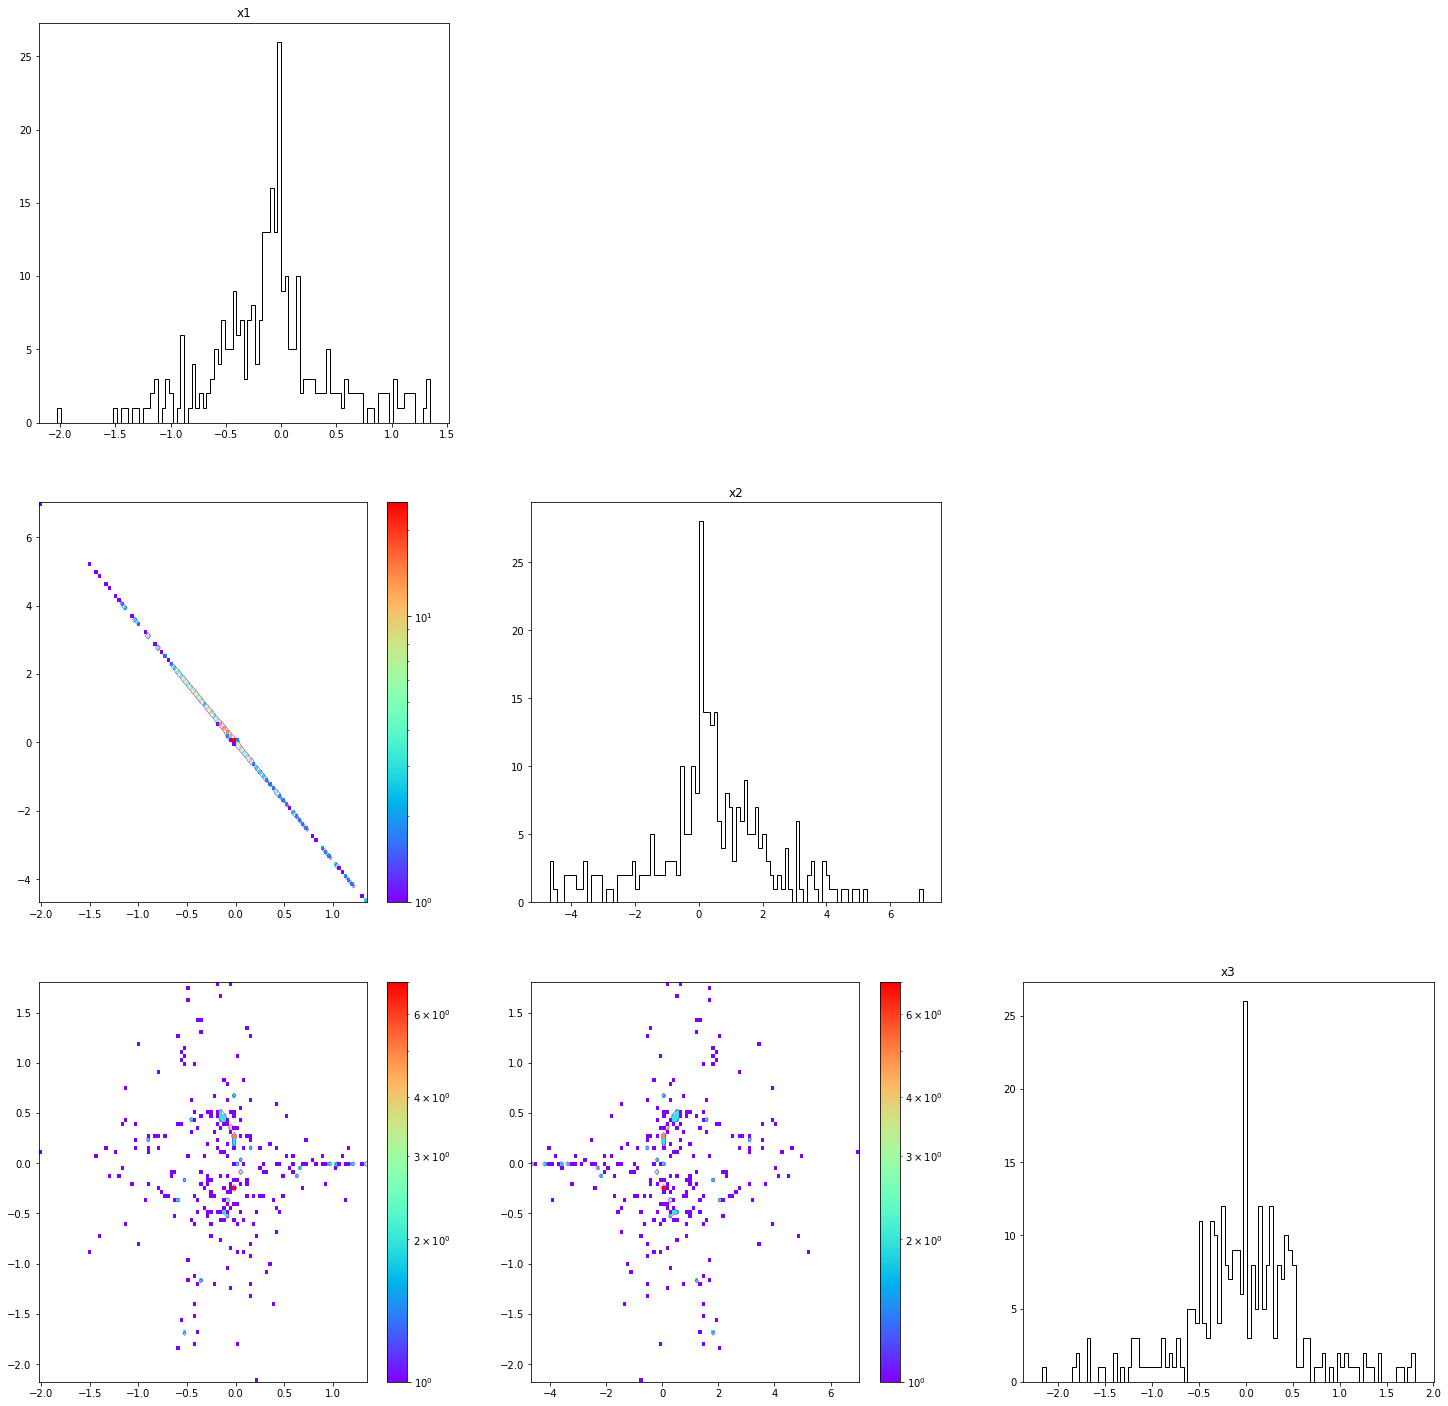

In [338]:
utils.triangular_plot(new_x.numpy().T)

In [6]:
########################################################################################################################
########################################################################################################################
########################################################################################################################
########################################################################################################################
########################################################################################################################
########################################################################################################################
########################################################################################################################
########################################################################################################################

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

tfmcmc = tfp.mcmc

def V3param(x):
    x1,x2,x3=tf.split(x, 3, axis=1)
    return 0.5 * (4 + tf.exp(6 * x1) + tf.exp(-2 * x1 -4 * (3 ** -0.5) * x2) 
                  -2 * (tf.exp(2 * x1 -2 * (3 ** -0.5) * x2)) 
                  -4 * (tf.exp(-2 * x1 -((3 ** -0.5) * x2))) 
                  -4 * (tf.exp(2 * x1 + (3 ** -0.5) * x2)) 
                  -4 * (x3 ** 2) + 2 * (tf.exp(-4 * x1 -2 * (3 ** -0.5) * x2)) * (x3 ** 2) 
                  + 2 * (tf.exp(4 * x1 + 2 * (3 ** -0.5) * x2)) * (x3 ** 2) 
                  + (tf.exp(-6 * x1)) * (x3 ** 4)
                  -2 * (tf.exp(-2 * x1 + 2 * (3 ** -0.5) * x2)) * (x3 ** 4) 
                  + (tf.exp(2 * x1 + 4 * (3 ** -0.5) * x2)) * (x3 ** 4))


def grad_norm_squared(V, x, factor=1):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = V(x)
    gradients = tape.gradient(loss, x)
    norm_squared = tf.reduce_sum(gradients**2, axis=-1)  # ||∇V||^2 pour chaque point
    return norm_squared 

def log_probability_no0(x):
    potential = grad_norm_squared(V3param, x) + 10/abs(tf.reduce_sum(x, axis=-1))
    return -potential

def log_probability(x):
    potential = grad_norm_squared(V3param, x)
    return -potential

In [ ]:
#######

In [104]:
# Initialisation des échantillons
n_samples = 10000  # Nombre de points
n_var = 3         # Nombre de variables
initial_state = tf.convert_to_tensor(x[:n_samples, :], dtype=tf.float32)

# Paramètres de MCMC
step_size = 10**(-2)
num_results = 10000
num_burnin_steps = 0


In [105]:
# Définition de la kernel de MCMC : RandomWalkMetropolis avec état par point
kernel = tfmcmc.RandomWalkMetropolis(
    target_log_prob_fn=log_probability,
    new_state_fn=tfmcmc.random_walk_normal_fn(scale=step_size)
)

In [123]:
t1 = time.time()
# Exécute la chaîne de Markov pour tous les points indépendamment
samples, is_accepted = tfmcmc.sample_chain(
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=samples[-1,:,:],
    kernel=kernel,
    trace_fn=lambda _, kr: kr.is_accepted,
    parallel_iterations=10
)

t2 = time.time() 

print(f"Total time for the random walk {t2 -t1} s.")

Total time for the random walk 330.8169288635254 s.


In [124]:
samples_ = samples.numpy()  # Conversion en numpy pour analyse si nécessaire
is_accepted = tf.stack(is_accepted)

# Calcul du taux d'acceptation
acceptance_rate = tf.reduce_mean(tf.cast(is_accepted, dtype=tf.float32))
print(f"Taux d'acceptation moyen : {acceptance_rate.numpy() * 100:.2f}%")

Taux d'acceptation moyen : 84.85%


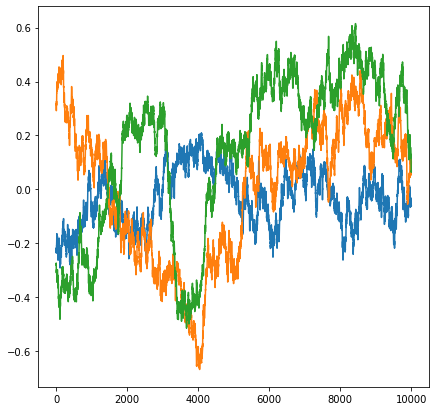

In [125]:
plt.figure(figsize = (7,7))
plt.plot(samples_[:,0,0])
plt.plot(samples_[:,0,1])
plt.plot(samples_[:,0,2])
plt.show()

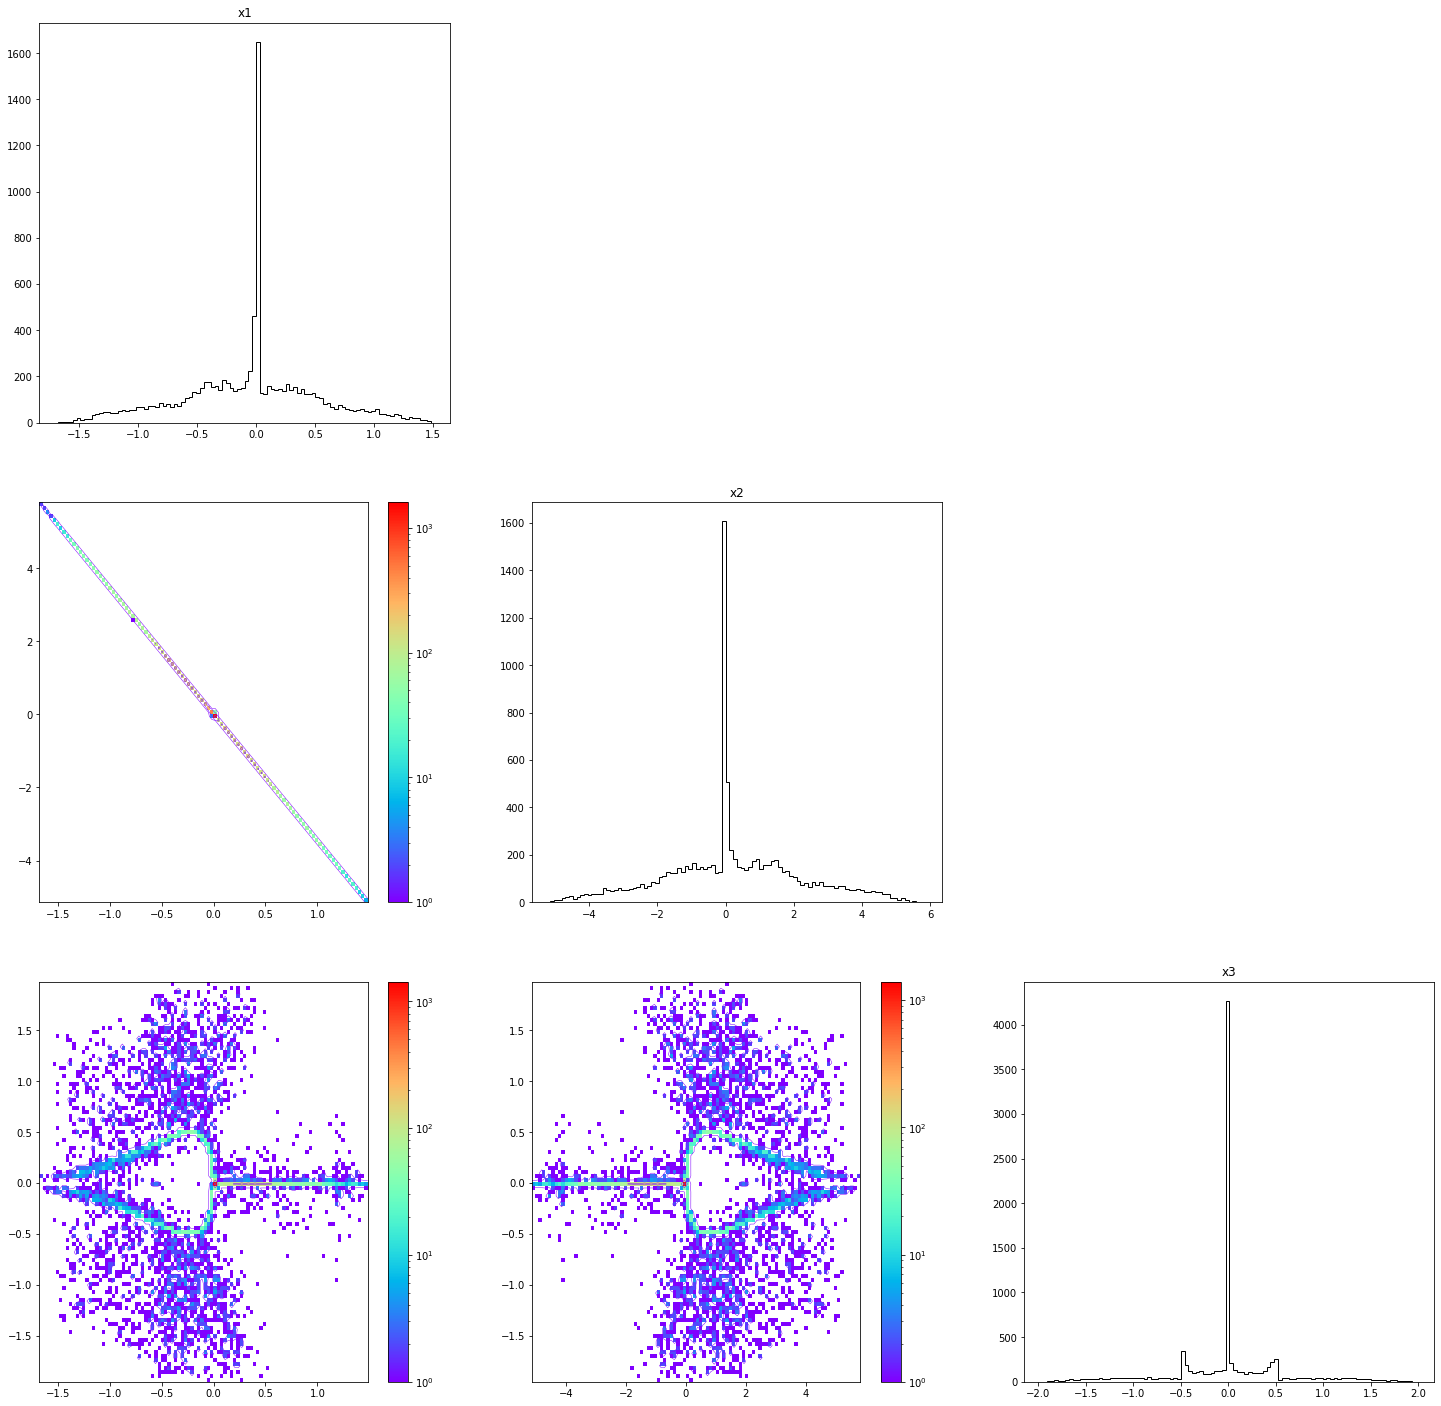

In [126]:
utils.triangular_plot(initial_state.numpy())

In [128]:
samples_.shape

(10000, 10000, 3)

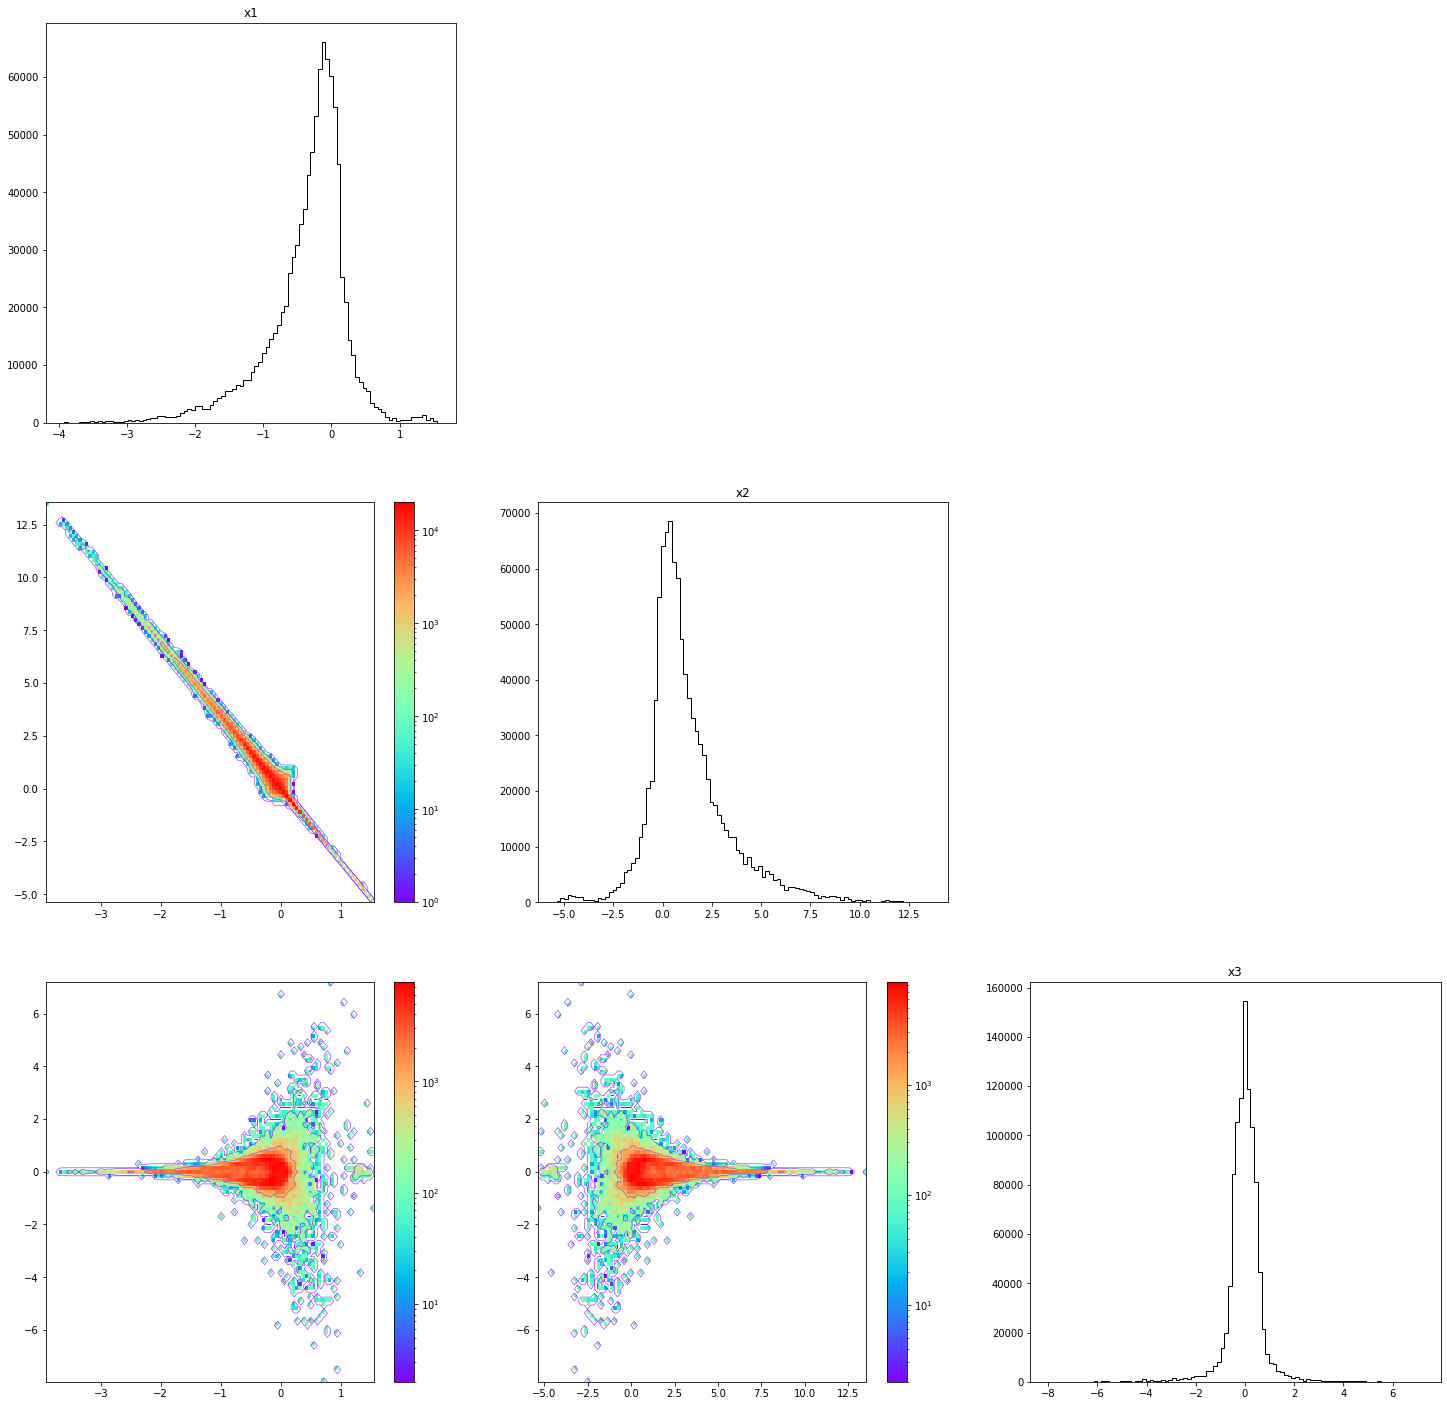

In [131]:
utils.triangular_plot(np.reshape(samples_[-100:,:,:],(100*10000, 3)))

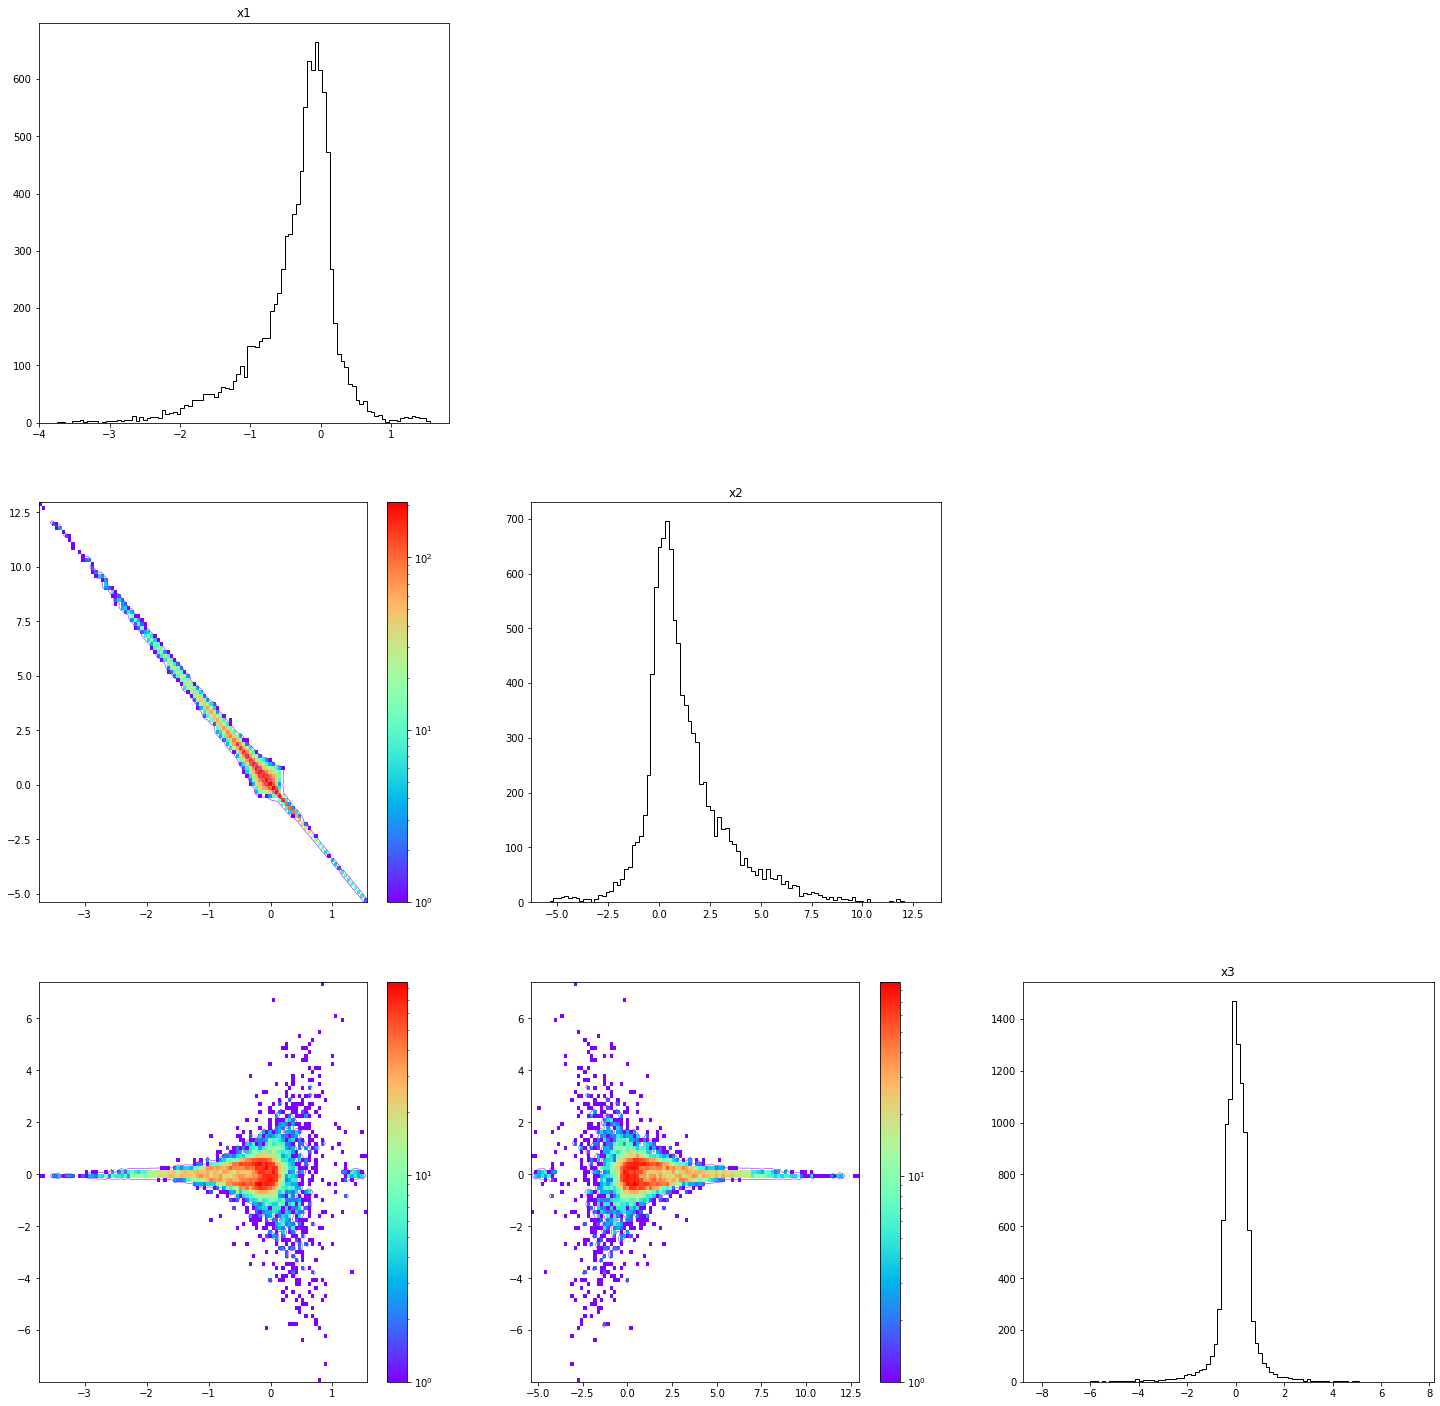

In [117]:
utils.triangular_plot(samples_[-1,:,:])

In [136]:
#hist_x, new_x = gdm.grad_descent_potential(V3param,tf.Variable(np.reshape(samples_[-100:,:,:],(100*10000, 3))),n_steps=500,alpha=10**(-2),update_opt=False)
hist_x, new_x = gdm.grad_descent_potential(V3param,new_x,n_steps=200,alpha=10**(-3),update_opt=False)

#tf.Variable(samples_[-1,:,:])

Step 0: ||∇V||^2 = 214115.5625 with learning rate 0.0010000000474974513
Step 10: ||∇V||^2 = 8905816.0 with learning rate 0.0010000000474974513
Step 20: ||∇V||^2 = 2918143.5 with learning rate 0.0010000000474974513
Step 30: ||∇V||^2 = 374174.5 with learning rate 0.0010000000474974513
Step 40: ||∇V||^2 = 80490.953125 with learning rate 0.0010000000474974513
Step 50: ||∇V||^2 = 43009.07421875 with learning rate 0.0010000000474974513
Step 60: ||∇V||^2 = 25034.294921875 with learning rate 0.0010000000474974513
Step 70: ||∇V||^2 = 12650.6142578125 with learning rate 0.0010000000474974513
Step 80: ||∇V||^2 = 3988.182373046875 with learning rate 0.0010000000474974513
Step 90: ||∇V||^2 = 1806.18505859375 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 464.2813415527344 with learning rate 0.0010000000474974513
Step 110: ||∇V||^2 = 240.40316772460938 with learning rate 0.0010000000474974513
Step 120: ||∇V||^2 = 39.06243133544922 with learning rate 0.0010000000474974513
Step 130: ||∇

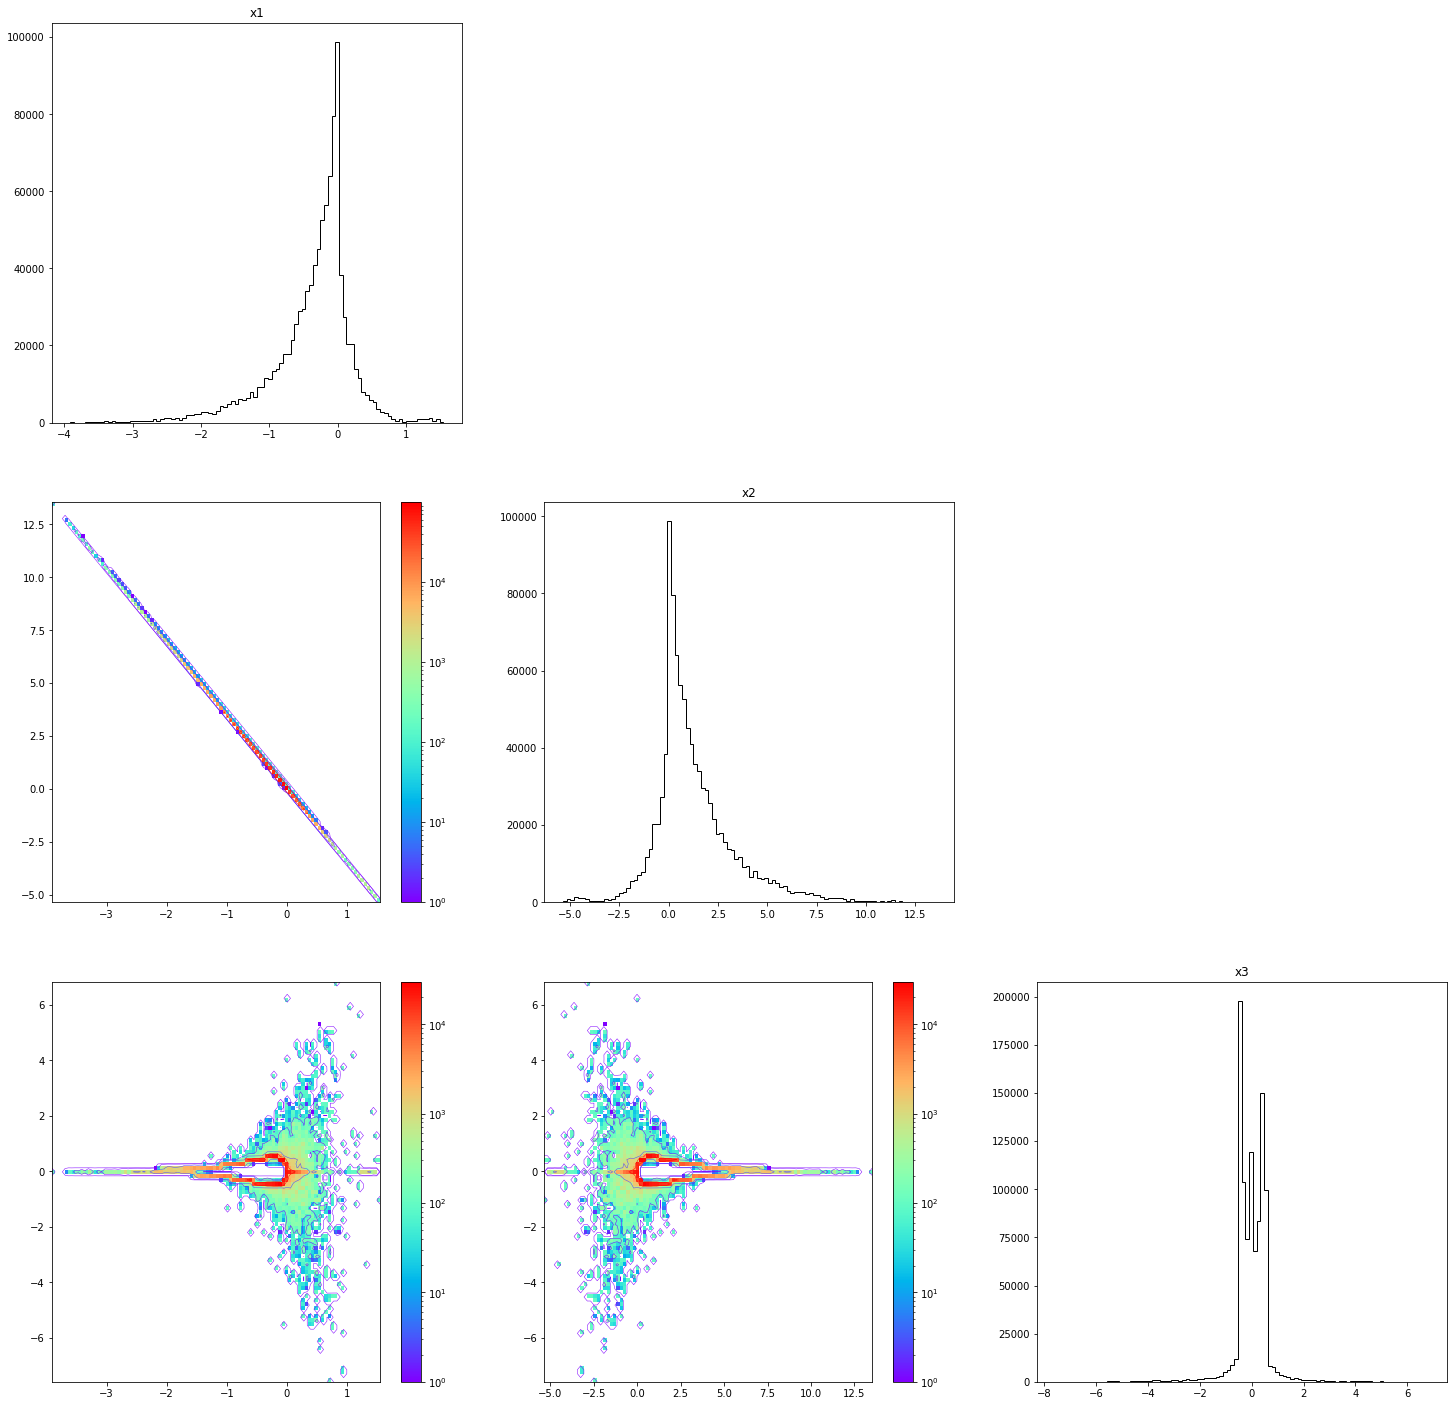

In [137]:
utils.triangular_plot(new_x.numpy())

In [ ]:
# 10**(-1) size_step and 100 000 steps

In [ ]:
utils.triangular_plot(initial_state.numpy())

In [ ]:
utils.triangular_plot(samples_[-1,:,:])

In [132]:
hist_x, new_x = gdm.grad_descent_potential(V3param,new_x,n_steps=1000,alpha=10**(-3),update_opt=False)


Step 0: ||∇V||^2 = 23.511947631835938 with learning rate 0.0010000000474974513
Step 10: ||∇V||^2 = 179269.96875 with learning rate 0.0010000000474974513
Step 20: ||∇V||^2 = 33200.1171875 with learning rate 0.0010000000474974513
Step 30: ||∇V||^2 = 2219.16162109375 with learning rate 0.0010000000474974513
Step 40: ||∇V||^2 = 4232.9775390625 with learning rate 0.0010000000474974513
Step 50: ||∇V||^2 = 2221.875732421875 with learning rate 0.0010000000474974513
Step 60: ||∇V||^2 = 754.0052490234375 with learning rate 0.0010000000474974513
Step 70: ||∇V||^2 = 190.89700317382812 with learning rate 0.0010000000474974513
Step 80: ||∇V||^2 = 41.36191177368164 with learning rate 0.0010000000474974513
Step 90: ||∇V||^2 = 31.828420639038086 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 49.075782775878906 with learning rate 0.0010000000474974513
Step 110: ||∇V||^2 = 31.112590789794922 with learning rate 0.0010000000474974513
Step 120: ||∇V||^2 = 2.565351724624634 with learning rate 

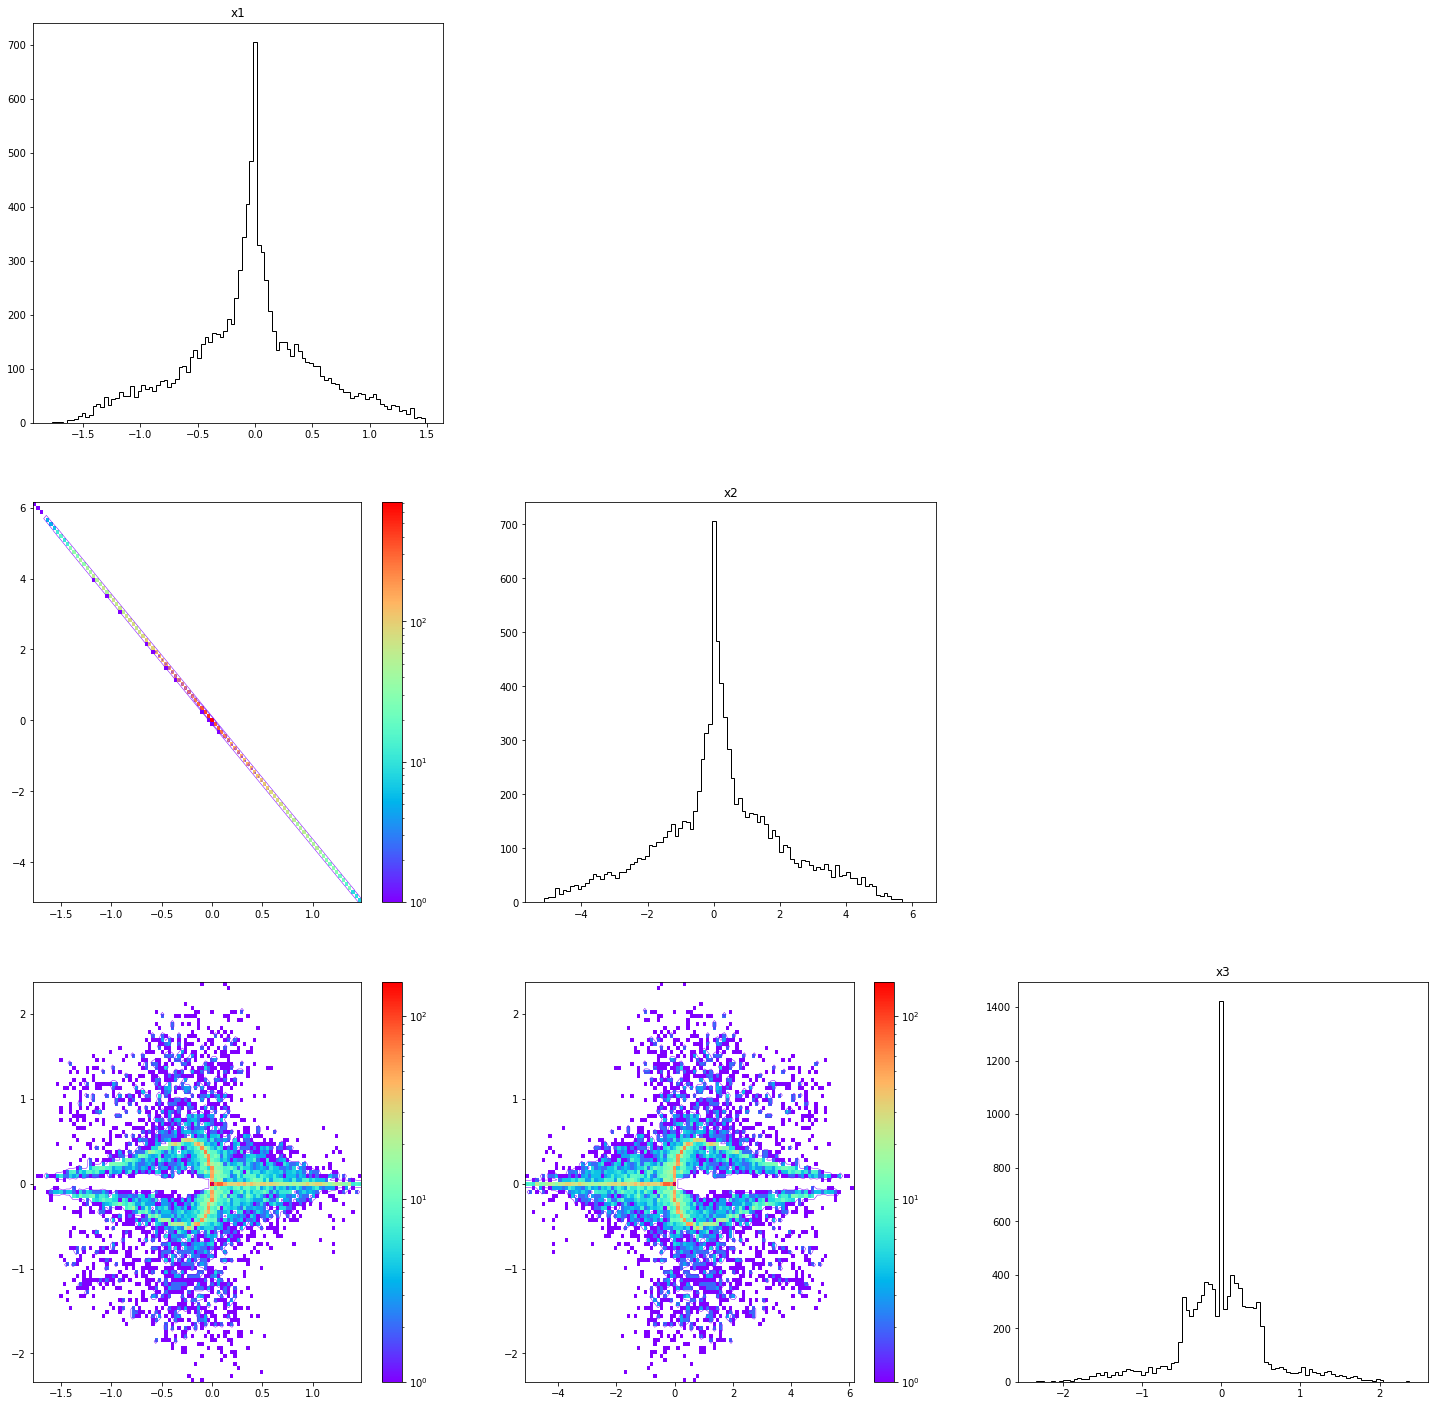

In [133]:
utils.triangular_plot(new_x.numpy())

In [ ]:
# 10**(-3) size_step and 100 000 steps

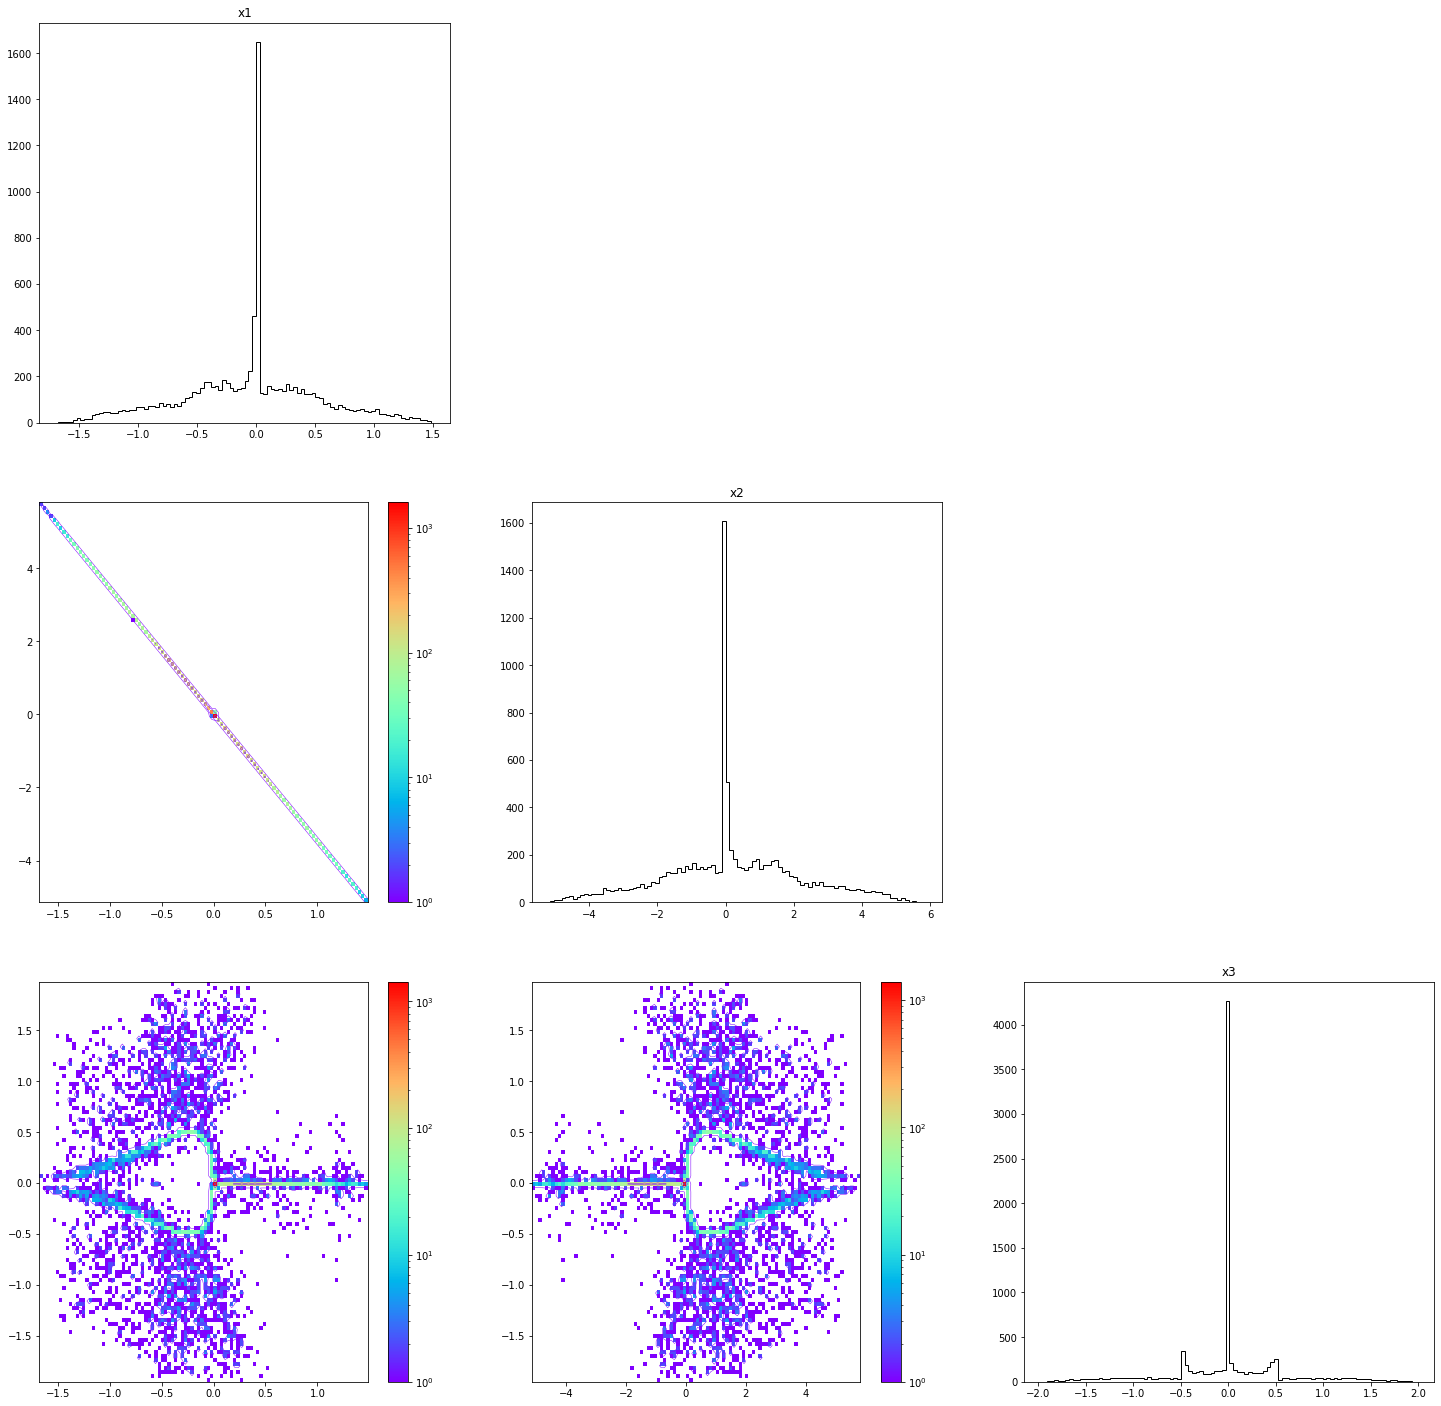

In [118]:
utils.triangular_plot(initial_state.numpy())

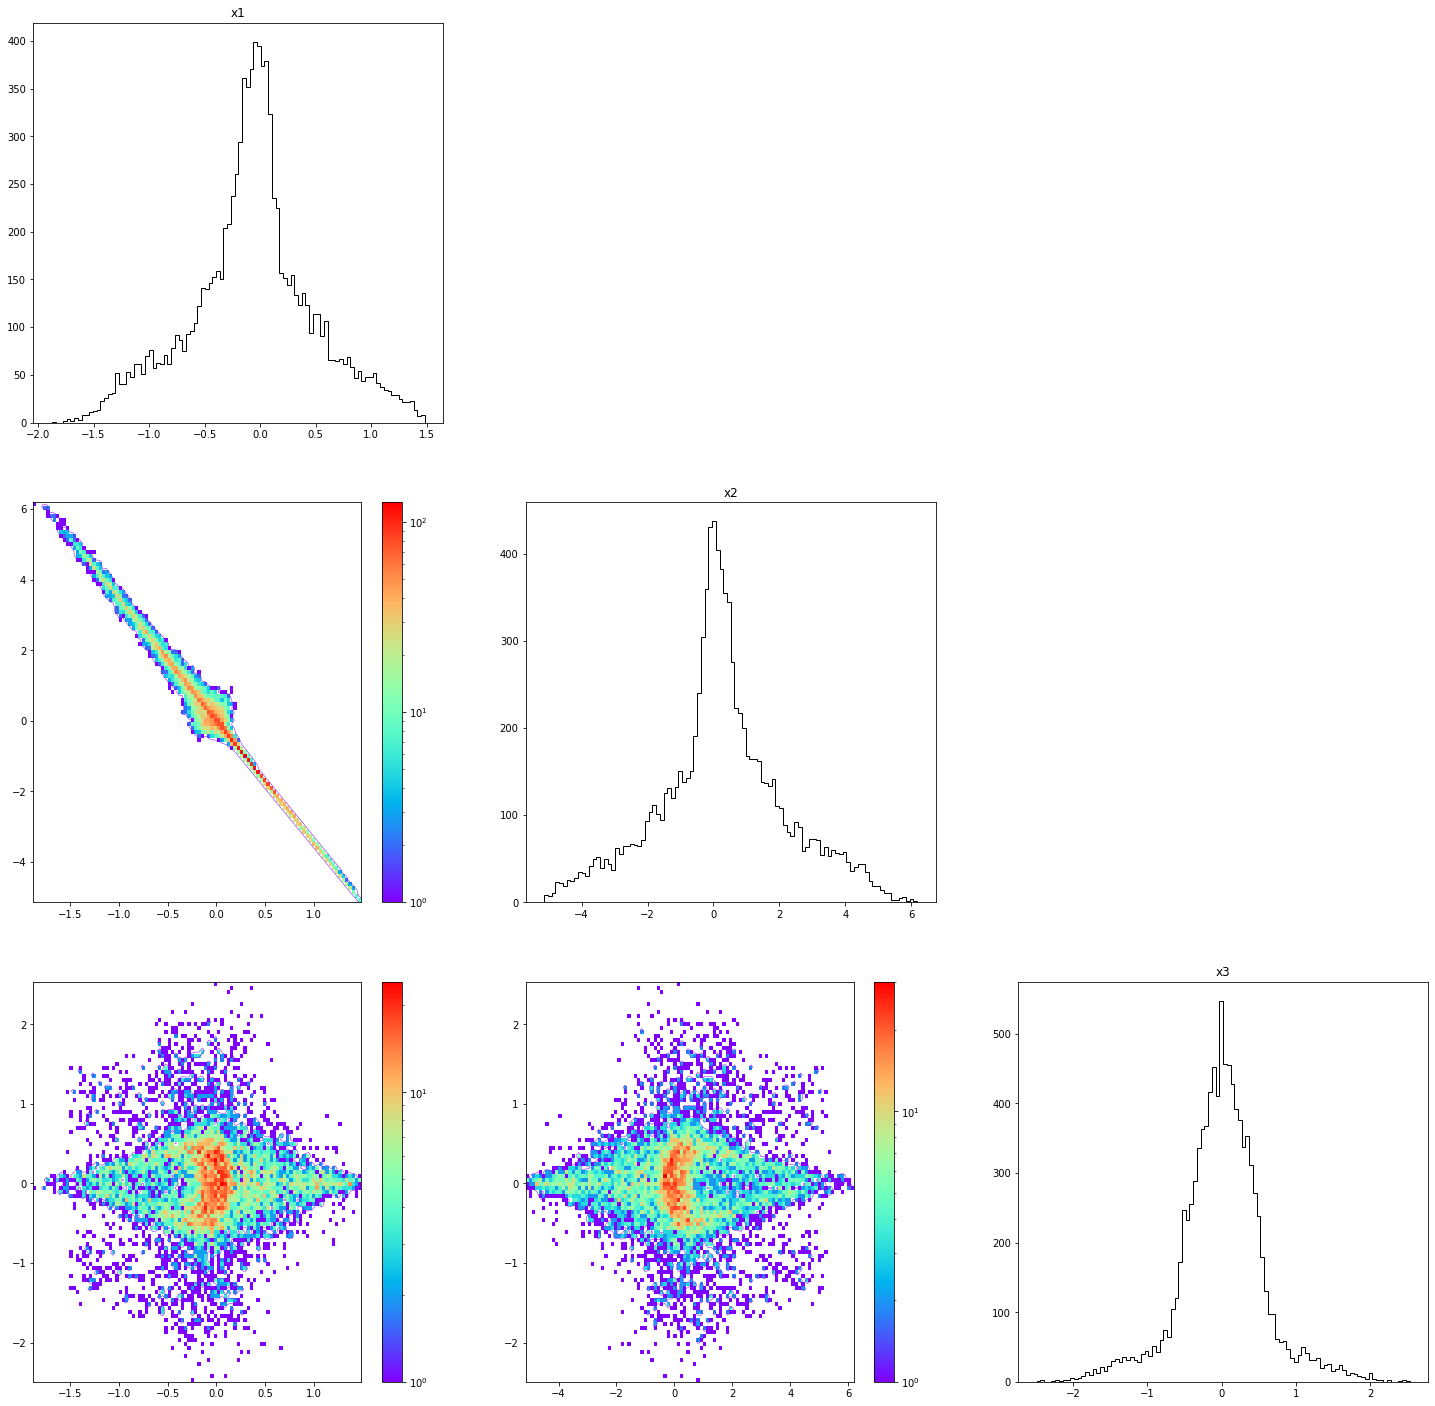

In [119]:
utils.triangular_plot(samples_[-1,:,:])

In [120]:
#grad_norm_squared(V3param,tf.Variable(samples_[-1,:,:]))
mask = tf.reduce_sum(get_grad(V3param,tf.Variable(samples_[-1,:,:]))**2,axis=1)<10**(15)

In [121]:
samples_filtered = np.array([np.extract(mask.numpy(),samples_[-1,:,i]) for i in range(3)])
print(samples_filtered.shape)

(3, 10000)


In [122]:
hist_x, new_x = gdm.grad_descent_potential(V3param,new_x,n_steps=1000,alpha=10**(-3),update_opt=False)


Step 0: ||∇V||^2 = 0.004861980676651001 with learning rate 0.0010000000474974513
Step 10: ||∇V||^2 = 210704.75 with learning rate 0.0010000000474974513
Step 20: ||∇V||^2 = 38058.9453125 with learning rate 0.0010000000474974513
Step 30: ||∇V||^2 = 2257.97216796875 with learning rate 0.0010000000474974513
Step 40: ||∇V||^2 = 4966.875 with learning rate 0.0010000000474974513
Step 50: ||∇V||^2 = 2617.761962890625 with learning rate 0.0010000000474974513
Step 60: ||∇V||^2 = 870.383544921875 with learning rate 0.0010000000474974513
Step 70: ||∇V||^2 = 218.38851928710938 with learning rate 0.0010000000474974513
Step 80: ||∇V||^2 = 28.38113021850586 with learning rate 0.0010000000474974513
Step 90: ||∇V||^2 = 54.05257034301758 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 116.64891815185547 with learning rate 0.0010000000474974513
Step 110: ||∇V||^2 = 2308.699462890625 with learning rate 0.0010000000474974513
Step 120: ||∇V||^2 = 177.01412963867188 with learning rate 0.00100000

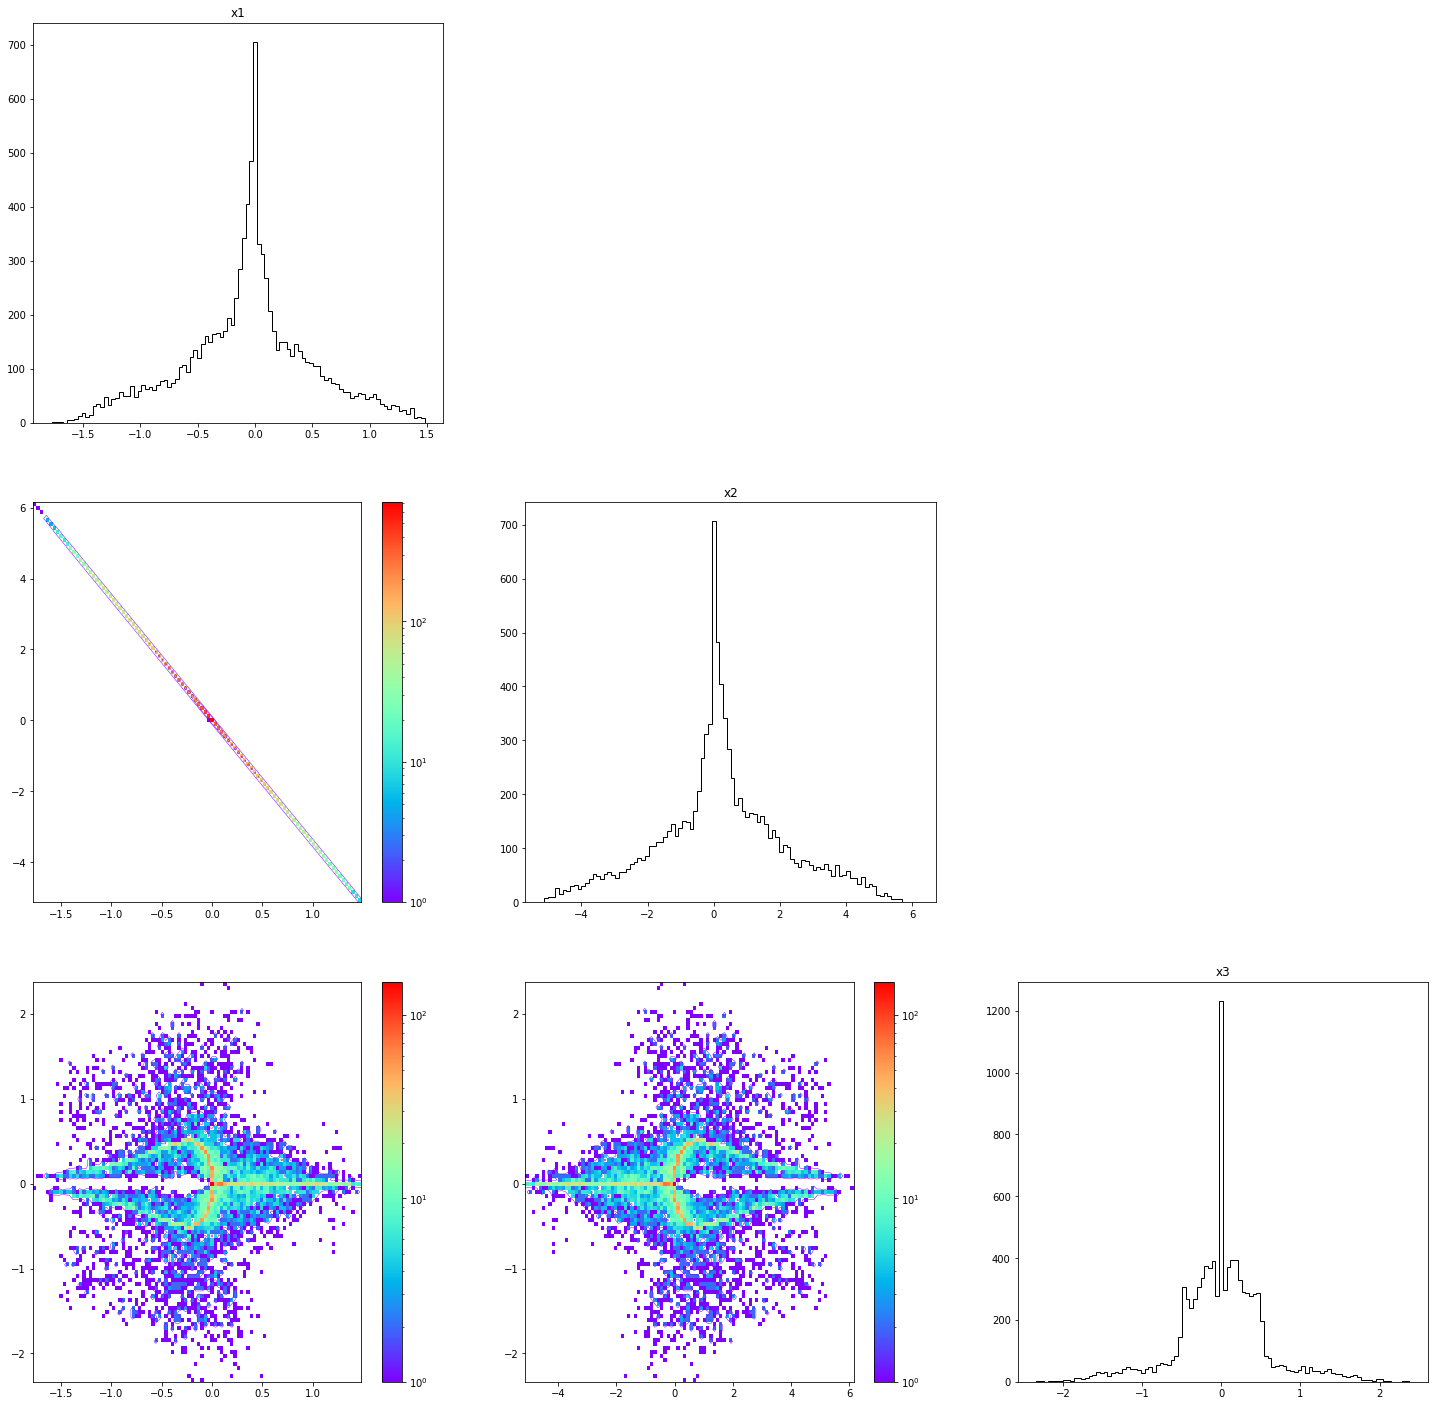

In [123]:
utils.triangular_plot(new_x.numpy())

In [ ]:
# try to alternate grad desc and random walk 

In [35]:
import tensorflow_probability as tfp
import time 
tfmcmc = tfp.mcmc

def V3param(x):
    x1,x2,x3=tf.split(x, 3, axis=1)
    return 0.5 * (4 + tf.exp(6 * x1) + tf.exp(-2 * x1 -4 * (3 ** -0.5) * x2) 
                  -2 * (tf.exp(2 * x1 -2 * (3 ** -0.5) * x2)) 
                  -4 * (tf.exp(-2 * x1 -((3 ** -0.5) * x2))) 
                  -4 * (tf.exp(2 * x1 + (3 ** -0.5) * x2)) 
                  -4 * (x3 ** 2) + 2 * (tf.exp(-4 * x1 -2 * (3 ** -0.5) * x2)) * (x3 ** 2) 
                  + 2 * (tf.exp(4 * x1 + 2 * (3 ** -0.5) * x2)) * (x3 ** 2) 
                  + (tf.exp(-6 * x1)) * (x3 ** 4)
                  -2 * (tf.exp(-2 * x1 + 2 * (3 ** -0.5) * x2)) * (x3 ** 4) 
                  + (tf.exp(2 * x1 + 4 * (3 ** -0.5) * x2)) * (x3 ** 4))


def grad_norm_squared(V, x, factor=1):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = V(x)
    gradients = tape.gradient(loss, x)
    norm_squared = tf.reduce_sum(gradients**2, axis=-1)  # ||∇V||^2 pour chaque point
    return norm_squared 

def log_probability(x):
    potential = grad_norm_squared(V3param, x) 
    return -potential

In [36]:
x = np.load("V3param_points.npy")

In [42]:
# Initialisation des échantillons
n_samples = 10000  # Nombre de points
n_var = 3         # Nombre de variables
initial_state = tf.convert_to_tensor(x[:n_samples, :], dtype=tf.float32)

# Paramètres de MCMC
step_size = 10**(-1)
num_results = 1000
num_burnin_steps = 0


In [43]:
# Définition de la kernel de MCMC : RandomWalkMetropolis avec état par point
kernel = tfmcmc.RandomWalkMetropolis(
    target_log_prob_fn=log_probability,
    new_state_fn=tfmcmc.random_walk_normal_fn(scale=step_size)
)

In [44]:
this_x = tf.convert_to_tensor(x[:n_samples, :], dtype=tf.float32)

for i in range(50):
    print(i)
    t1 = time.time()
    samples, is_accepted = tfmcmc.sample_chain(
        num_results=1,
        num_burnin_steps=num_results,
        current_state=this_x,
        kernel=kernel,
        trace_fn=lambda _, kr: kr.is_accepted,
        parallel_iterations=10
)
    t2 = time.time()
    print(f"Random walk done in {t2-t1} s.")
    hist_, this_x = gdm.grad_descent_potential(V3param,tf.Variable(samples[-1,:,:]),n_steps=500,alpha=10**(-3),update_opt=False,n_step_print=100)


0
Random walk done in 34.94339990615845 s.
Step 0: ||∇V||^2 = 4166.62060546875 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 152.07904052734375 with learning rate 0.0010000000474974513
Step 200: ||∇V||^2 = 35.413909912109375 with learning rate 0.0010000000474974513
Step 300: ||∇V||^2 = 13.4529447555542 with learning rate 0.0010000000474974513
Step 400: ||∇V||^2 = 6.5519280433654785 with learning rate 0.0010000000474974513
1
Random walk done in 35.094630002975464 s.
Step 0: ||∇V||^2 = 4085.141357421875 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 149.10641479492188 with learning rate 0.0010000000474974513
Step 200: ||∇V||^2 = 32.452903747558594 with learning rate 0.0010000000474974513
Step 300: ||∇V||^2 = 12.822603225708008 with learning rate 0.0010000000474974513
Step 400: ||∇V||^2 = 6.095655918121338 with learning rate 0.0010000000474974513
2
Random walk done in 34.40519881248474 s.
Step 0: ||∇V||^2 = 4184.724609375 with learning rate 0.001000000047497

Step 300: ||∇V||^2 = 12.563703536987305 with learning rate 0.0010000000474974513
Step 400: ||∇V||^2 = 6.031792640686035 with learning rate 0.0010000000474974513
19
Random walk done in 31.488856077194214 s.
Step 0: ||∇V||^2 = 4041.164794921875 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 136.2526092529297 with learning rate 0.0010000000474974513
Step 200: ||∇V||^2 = 1242.5201416015625 with learning rate 0.0010000000474974513
Step 300: ||∇V||^2 = 11.831669807434082 with learning rate 0.0010000000474974513
Step 400: ||∇V||^2 = 5.9061689376831055 with learning rate 0.0010000000474974513
20
Random walk done in 31.621359825134277 s.
Step 0: ||∇V||^2 = 4060.17138671875 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 148.58560180664062 with learning rate 0.0010000000474974513
Step 200: ||∇V||^2 = 35.46009826660156 with learning rate 0.0010000000474974513
Step 300: ||∇V||^2 = 14.225221633911133 with learning rate 0.0010000000474974513
Step 400: ||∇V||^2 = 6.581624

Step 100: ||∇V||^2 = 152.70230102539062 with learning rate 0.0010000000474974513
Step 200: ||∇V||^2 = 37.73847579956055 with learning rate 0.0010000000474974513
Step 300: ||∇V||^2 = 15.540658950805664 with learning rate 0.0010000000474974513
Step 400: ||∇V||^2 = 7.621814250946045 with learning rate 0.0010000000474974513
38
Random walk done in 32.76510524749756 s.
Step 0: ||∇V||^2 = 3991.61376953125 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 146.96978759765625 with learning rate 0.0010000000474974513
Step 200: ||∇V||^2 = 36.28533935546875 with learning rate 0.0010000000474974513
Step 300: ||∇V||^2 = 14.730206489562988 with learning rate 0.0010000000474974513
Step 400: ||∇V||^2 = 6.913166046142578 with learning rate 0.0010000000474974513
39
Random walk done in 32.05360198020935 s.
Step 0: ||∇V||^2 = 4001.97119140625 with learning rate 0.0010000000474974513
Step 100: ||∇V||^2 = 128.34547424316406 with learning rate 0.0010000000474974513
Step 200: ||∇V||^2 = 24.875766754

In [50]:
hist_, this_x = gdm.grad_descent_potential(V3param,this_x,n_steps=100,alpha=10**(-3),update_opt=False,n_step_print=100)


Step 0: ||∇V||^2 = 119.4141616821289 with learning rate 0.0010000000474974513


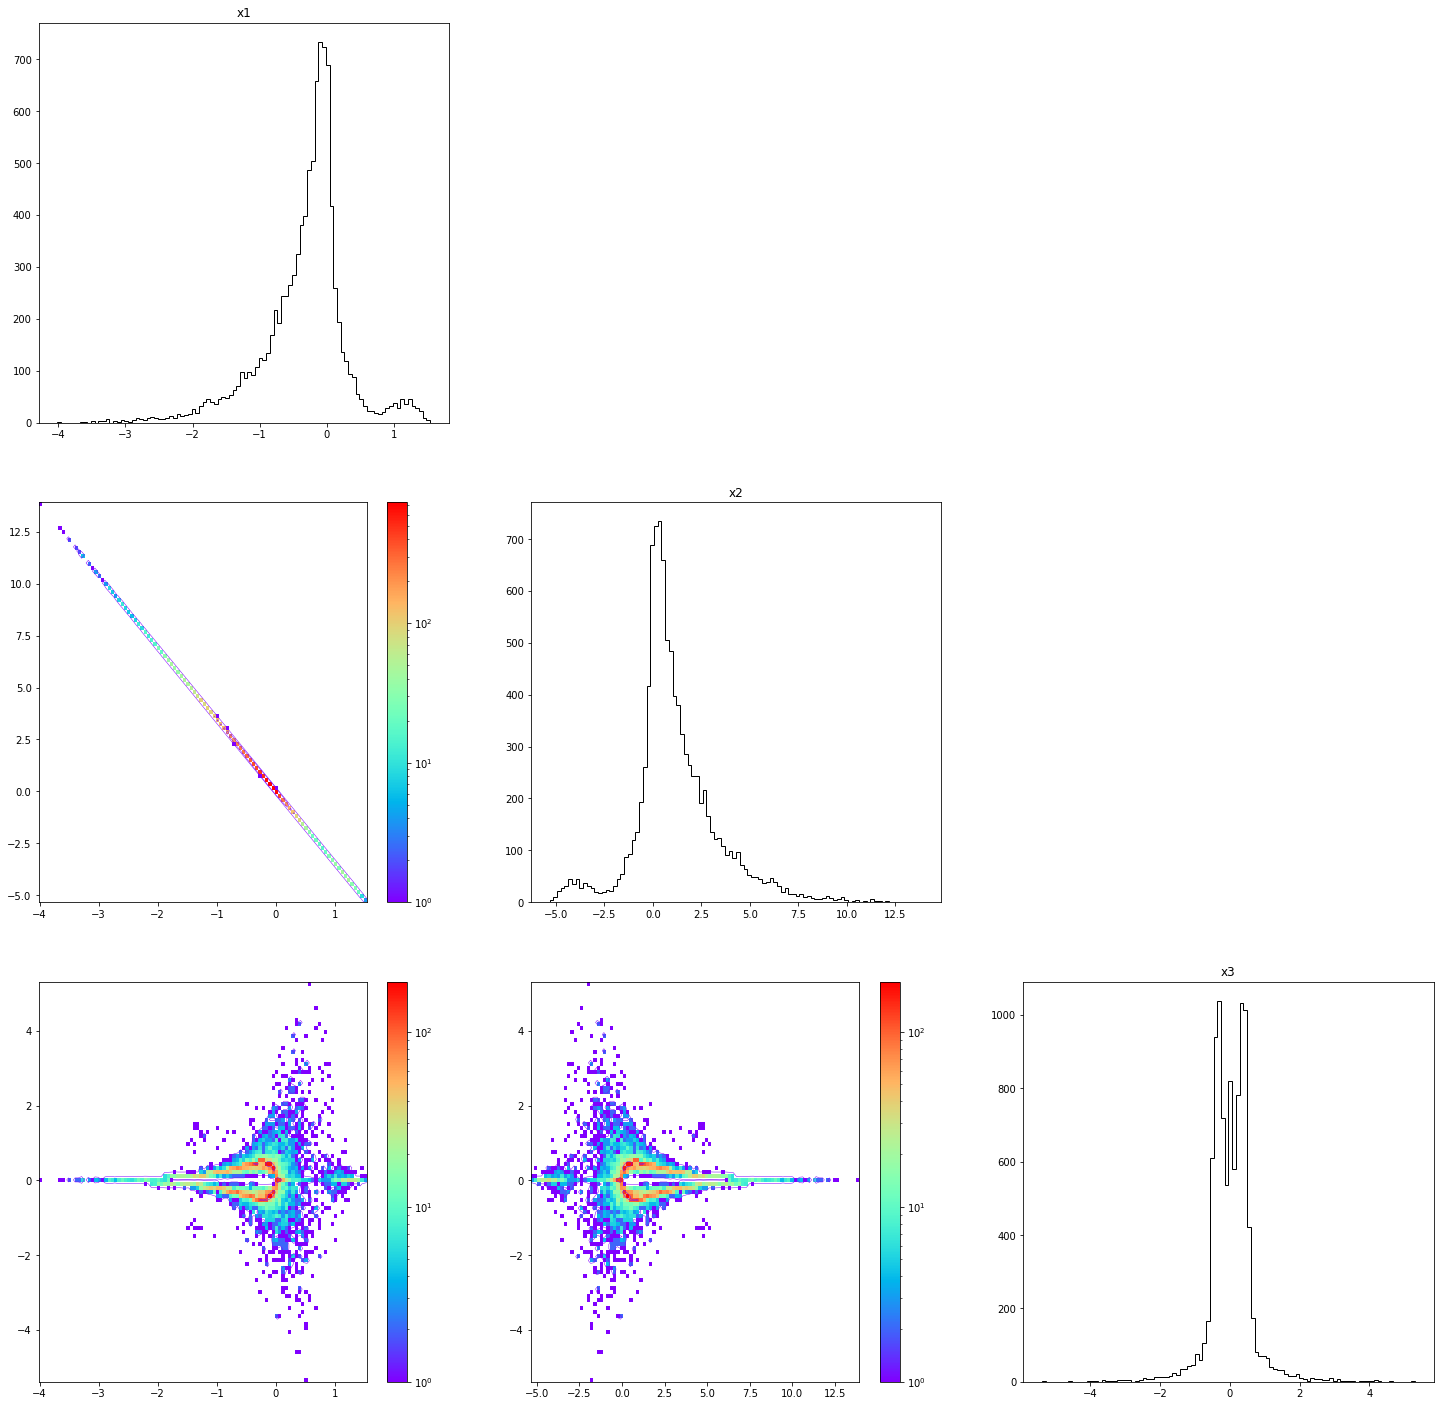

In [51]:
utils.triangular_plot(this_x.numpy())